In [24]:
import pandas  as pd
import seaborn as sns
import matplotlib as plt
%matplotlib inline

In [2]:
df = pd.read_csv('lesson_3_data_1_.csv', encoding = 'windows-1251')

In [5]:
df.head()

,Unnamed: 0,tk,pl,dia,hs,tc,cta,id_art,id_subsubfam,id_subfam,...,id_famn,id_seccion,id_subagr,id_agr,vta,uni,id_artn,art_sp,fam_sp,fam_en
0,1242,120071109002055793,1,2007/11/09,0.505729,110000761,11000076,21895,101070640100,1010706401,...,10107064,10107,101,1,0.68,1.0,21895,MARAVILLA 500 G Store_Brand,PASTA ALIMENTICIA SE,pasta
1,1243,120070601004053633,1,2007/06/01,0.588519,110000761,11000076,21816,101070640100,1010706401,...,10107064,10107,101,1,0.38,1.0,21816,FIDEO CABELLIN 500 G Store_Brand,PASTA ALIMENTICIA SE,pasta
2,1244,120070928004076410,1,2007/09/28,0.785498,28491841,2849184,562840,101070640100,1010706401,...,10107064,10107,101,1,1.55,2.0,562840,SPAGUETTI Nє 5 500 G Brand_1,PASTA ALIMENTICIA SE,pasta
3,1245,120070616003074261,1,2007/06/16,0.550961,95931501,9593150,28914,101070640100,1010706401,...,10107064,10107,101,1,1.03,2.0,28914,FIDEO FIDEUБ 500 Brand_7,PASTA ALIMENTICIA SE,pasta
4,1246,120070519001018477,1,2007/05/19,0.804954,93265591,9326559,159867,101070640100,1010706401,...,10107064,10107,101,1,1.09,1.0,159867,MACARRONES GRATINAR 5 Brand_2,PASTA ALIMENTICIA SE,pasta


In [3]:
user_df = df[['tc', 'art_sp']]

In [4]:
user_df.head()

,tc,art_sp
0,110000761,MARAVILLA 500 G Store_Brand
1,110000761,FIDEO CABELLIN 500 G Store_Brand
2,28491841,SPAGUETTI Nє 5 500 G Brand_1
3,95931501,FIDEO FIDEUБ 500 Brand_7
4,93265591,MACARRONES GRATINAR 5 Brand_2


In [4]:
user_df.rename(columns = {'tc':'user_id', 'art_sp':'brand_info'}, inplace = True)

C:\Users\бвс\AppData\Local\Temp\ipykernel_5500\2557092919.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_df.rename(columns = {'tc':'user_id', 'art_sp':'brand_info'}, inplace = True)


In [13]:
user_df.head()

,user_id,brand_info,brand_name
0,110000761,MARAVILLA 500 G Store_Brand,Store_Brand
1,110000761,FIDEO CABELLIN 500 G Store_Brand,Store_Brand
2,28491841,SPAGUETTI Nє 5 500 G Brand_1,Brand_1
3,95931501,FIDEO FIDEUБ 500 Brand_7,Brand_7
4,93265591,MACARRONES GRATINAR 5 Brand_2,Brand_2


In [12]:
brand_name = 'MARAVILLA        500 G Store_Brand'

In [14]:
brand_name.split(' ')[-1]

'Store_Brand'

In [5]:
def split_brand(brand_name):
    return brand_name.split(' ')[-1]

In [6]:
user_df['brand_name'] = user_df.brand_info.apply(split_brand)

C:\Users\бвс\AppData\Local\Temp\ipykernel_5500\3882918508.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_df['brand_name'] = user_df.brand_info.apply(split_brand)


In [7]:
user_df['brand_name'] = user_df.brand_info.apply(lambda x: x.split(' ')[-1])
#используем lambda функцию чтобы разбить строку по пробелу и взять последний элемент

C:\Users\бвс\AppData\Local\Temp\ipykernel_5500\3416034356.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_df['brand_name'] = user_df.brand_info.apply(lambda x: x.split(' ')[-1])


In [8]:
user_purchases = user_df.groupby('user_id', as_index = False)\
.agg({'brand_name':'count'})\
.rename(columns = {'brand_name':'purchases'})\
.query('purchases >= 5')

In [9]:
users_unique_brands = user_df.groupby('user_id', as_index = False)\
    .agg({'brand_name':pd.Series.nunique})\
    .rename(columns = {'brand_name':'unique_brands'})

In [10]:
users_unique_brands.head()

,user_id,unique_brands
0,-1236394515,1
1,1031,2
2,4241,2
3,17311,1
4,17312,2


In [11]:
user_purchases.purchases.median()

7.0

In [12]:
user_purchases.purchases.describe()
#75й процентиль равен 5. 25% покупателей совершили больше 5 покупок

count    3383.000000
mean        9.320130
std         5.623993
min         5.000000
25%         6.000000
50%         7.000000
75%        11.000000
max        60.000000
Name: purchases, dtype: float64

In [14]:
lovely_brand_purchases_df = user_df.groupby(['user_id','brand_name'], as_index = False)\
    .agg({'brand_info':'count'})\
    .sort_values(['user_id','brand_info'], ascending = [False, False])\
    .groupby('user_id')\
    .head(1)\
    .rename(columns = {'brand_name':'lovely_brand','brand_info':'lovely_brand_purchases'})
   

head(1) после группировки выдает первый выдает первую запись по сгруппированому полю

### Объединяем 3 датафрейма в 1

In [18]:
loyality_df = user_purchases.merge(users_unique_brands, on = 'user_id')\
              .merge(lovely_brand_purchases_df, on = 'user_id')

In [19]:
loyality_df.head()

,user_id,purchases,unique_brands,lovely_brand,lovely_brand_purchases
0,1031,6,2,Store_Brand,5
1,4241,5,2,Brand_4,3
2,25971,7,2,Store_Brand,5
3,40911,27,5,Brand_4,19
4,45181,5,4,Store_Brand,2


In [20]:
loyal_user = loyality_df[loyality_df.unique_brands == 1]
#выбрали юзеров, кто покупает только 1 бренд и выделили их в лояльные юзеры

,user_id,purchases,unique_brands,lovely_brand,lovely_brand_purchases
13,86281,14,1,Brand_4,14
18,94961,6,1,Brand_4,6
29,132061,9,1,Brand_4,9
30,134281,6,1,Brand_4,6
35,157311,12,1,Brand_4,12
...,...,...,...,...,...
3372,1010244089,9,1,Store_Brand,9
3374,1010247239,5,1,Brand_4,5
3376,1010274559,5,1,Brand_4,5
3377,1110091379,5,1,Brand_1,5


In [21]:
loyality_df['loyality_score'] = loyality_df['lovely_brand_purchases'] / loyality_df['purchases']

In [22]:
loyality_df.head()

,user_id,purchases,unique_brands,lovely_brand,lovely_brand_purchases,loyality_score
0,1031,6,2,Store_Brand,5,0.833333
1,4241,5,2,Brand_4,3,0.600000
2,25971,7,2,Store_Brand,5,0.714286
3,40911,27,5,Brand_4,19,0.703704
4,45181,5,4,Store_Brand,2,0.400000


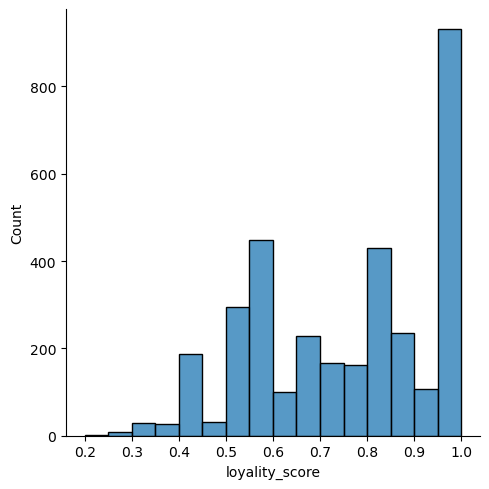

In [25]:
sns.displot(loyality_df.loyality_score);

In [28]:
loyality_df.groupby('lovely_brand', as_index = False)\
    .agg({'loyality_score':'median', 'user_id':'count'})

,lovely_brand,loyality_score,user_id
0,Brand_1,0.679487,410
1,Brand_2,0.600000,88
2,Brand_3,0.500000,115
3,Brand_4,0.818182,2041
4,Brand_5,0.600000,5
5,Brand_7,0.444444,9
6,Store_Brand,0.750000,715


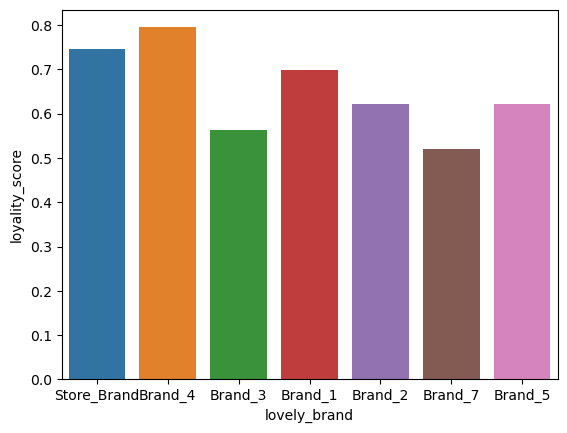

In [32]:
sns.barplot(data=loyality_df, x="lovely_brand", y="loyality_score", errorbar = None);

In [ ]:
#добавляем колонку older_than_30 True усли age > 30
df['older_than_30'] = df.age.apply(lambda x: True if x > 30 else False)